In [1]:
import pandas as pd

In [2]:
data_df = pd.read_csv("data/books_data.csv")

data_df.head()

,Title,description,authors,image,previewLink,publisher,publishedDate,infoLink,categories,ratingsCount
0,Its Only Art If Its Well Hung!,NaN,['Julie Strain'],http://books.google.com/books/content?id=DykPA...,http://books.google.nl/books?id=DykPAAAACAAJ&d...,NaN,1996,http://books.google.nl/books?id=DykPAAAACAAJ&d...,['Comics & Graphic Novels'],NaN
1,Dr. Seuss: American Icon,Philip Nel takes a fascinating look into the k...,['Philip Nel'],http://books.google.com/books/content?id=IjvHQ...,http://books.google.nl/books?id=IjvHQsCn_pgC&p...,A&C Black,2005-01-01,http://books.google.nl/books?id=IjvHQsCn_pgC&d...,['Biography & Autobiography'],NaN
2,Wonderful Worship in Smaller Churches,This resource includes twelve principles in un...,['David R. Ray'],http://books.google.com/books/content?id=2tsDA...,http://books.google.nl/books?id=2tsDAAAACAAJ&d...,NaN,2000,http://books.google.nl/books?id=2tsDAAAACAAJ&d...,['Religion'],NaN
3,Whispers of the Wicked Saints,Julia Thomas finds her life spinning out of co...,['Veronica Haddon'],http://books.google.com/books/content?id=aRSIg...,http://books.google.nl/books?id=aRSIgJlq6JwC&d...,iUniverse,2005-02,http://books.google.nl/books?id=aRSIgJlq6JwC&d...,['Fiction'],NaN
4,"Nation Dance: Religion, Identity and Cultural ...",NaN,['Edward Long'],NaN,http://books.google.nl/books?id=399SPgAACAAJ&d...,NaN,2003-03-01,http://books.google.nl/books?id=399SPgAACAAJ&d...,NaN,NaN


In [3]:
rating_df = pd.read_csv("data/books_rating.csv")

rating_df.head()

,Id,Title,Price,User_id,profileName,score,time,summary,text
0,1882931173,Its Only Art If Its Well Hung!,NaN,AVCGYZL8FQQTD,"Jim of Oz ""jim-of-oz""",4.0,940636800,Nice collection of Julie Strain images,This is only for Julie Strain fans. It's a col...
1,0826414346,Dr. Seuss: American Icon,NaN,A30TK6U7DNS82R,Kevin Killian,5.0,1095724800,Really Enjoyed It,I don't care much for Dr. Seuss but after read...
2,0826414346,Dr. Seuss: American Icon,NaN,A3UH4UZ4RSVO82,John Granger,5.0,1078790400,Essential for every personal and Public Library,"If people become the books they read and if ""t..."
3,0826414346,Dr. Seuss: American Icon,NaN,A2MVUWT453QH61,"Roy E. Perry ""amateur philosopher""",4.0,1090713600,Phlip Nel gives silly Seuss a serious treatment,"Theodore Seuss Geisel (1904-1991), aka &quot;D..."
4,0826414346,Dr. Seuss: American Icon,NaN,A22X4XUPKF66MR,"D. H. Richards ""ninthwavestore""",4.0,1107993600,Good academic overview,Philip Nel - Dr. Seuss: American IconThis is b...


## Books Data Exploração

In [4]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 212404 entries, 0 to 212403
Data columns (total 10 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Title          212403 non-null  object 
 1   description    143962 non-null  object 
 2   authors        180991 non-null  object 
 3   image          160329 non-null  object 
 4   previewLink    188568 non-null  object 
 5   publisher      136518 non-null  object 
 6   publishedDate  187099 non-null  object 
 7   infoLink       188568 non-null  object 
 8   categories     171205 non-null  object 
 9   ratingsCount   49752 non-null   float64
dtypes: float64(1), object(9)
memory usage: 16.2+ MB


In [5]:
data_df.describe()

,ratingsCount
count,49752.000000
mean,21.252975
std,201.340431
min,1.000000
25%,1.000000
50%,2.000000
75%,5.000000
max,4895.000000


In [6]:
data_df.describe(include='object')

,Title,description,authors,image,previewLink,publisher,publishedDate,infoLink,categories
count,212403,143962,180991,160329,188568,136518,187099,188568,171205
unique,212403,133226,127278,149387,188099,16016,11582,184506,10883
top,Its Only Art If Its Well Hung!,Unlike some other reproductions of classic tex...,['Rose Arny'],http://books.google.com/books/content?id=7dMSA...,http://books.google.com/books?id=acwPAgAAQBAJ&...,Simon and Schuster,2000,https://play.google.com/store/books/details?id...,['Fiction']
freq,1,92,236,79,17,3454,4286,18,23419


In [7]:
# Filter out null descriptions first
non_null_df = data_df[data_df['description'].notnull()]

# Find duplicated descriptions (keep=False returns all duplicates)
duplicated_df = non_null_df[non_null_df.duplicated(subset='description', keep=False)]

# Sort so repeated descriptions appear grouped
duplicated_df = duplicated_df.sort_values(by='description')

# Show result
duplicated_df.head(10)


,Title,description,authors,image,previewLink,publisher,publishedDate,infoLink,categories,ratingsCount
125018,The Complete Colorado Campground Guide & Atlas,!! ALL NEW CAMPGROUND GUIDE COMING IN SPRING 2...,['Outdoor Books & Maps (Firm)'],http://books.google.com/books/content?id=pdihf...,http://books.google.nl/books?id=pdihfO2SQqYC&p...,Adler Publishing,1992,http://books.google.nl/books?id=pdihfO2SQqYC&d...,['Travel'],NaN
157372,Camping Colorado (Regional Camping Series),!! ALL NEW CAMPGROUND GUIDE COMING IN SPRING 2...,['Outdoor Books & Maps (Firm)'],http://books.google.com/books/content?id=pdihf...,http://books.google.com/books?id=pdihfO2SQqYC&...,Adler Publishing,1992,http://books.google.com/books?id=pdihfO2SQqYC&...,['Travel'],NaN
114880,The Rivers Ran East,""" ... Post-World War II account of Leonard Cla...",['Leonard Clark'],http://books.google.com/books/content?id=cGJPW...,http://books.google.nl/books?id=cGJPWgPMCNQC&p...,Travelers' Tales,2001,http://books.google.nl/books?id=cGJPWgPMCNQC&d...,['History'],2.0
25299,The Rivers Ran East (U.K. Reprint),""" ... Post-World War II account of Leonard Cla...",['Leonard Clark'],http://books.google.com/books/content?id=cGJPW...,http://books.google.com/books?id=cGJPWgPMCNQC&...,Travelers' Tales,2001,http://books.google.com/books?id=cGJPWgPMCNQC&...,['History'],2.0
87840,Bring Me His Ears,"""""Bring Me His Ears"""" by Clarence Edward Mulfo...",['Clarence Edward Mulford'],http://books.google.com/books/content?id=jdnCD...,http://books.google.com/books?id=jdnCDwAAQBAJ&...,Good Press,2021-04-25,https://play.google.com/store/books/details?id...,['Fiction'],NaN
179805,"""Bring me his ears"",","""""Bring Me His Ears"""" by Clarence Edward Mulfo...",['Clarence Edward Mulford'],http://books.google.com/books/content?id=jdnCD...,http://books.google.com/books?id=jdnCDwAAQBAJ&...,Good Press,2021-04-25,https://play.google.com/store/books/details?id...,['Fiction'],NaN
13954,"An introduction to Christian apologetics,: A p...","""""In pleading for the biblical view of God and...",['Edward J. Carnell'],http://books.google.com/books/content?id=pvdJA...,http://books.google.nl/books?id=pvdJAwAAQBAJ&p...,Wipf and Stock Publishers,2007-10-01,https://play.google.com/store/books/details?id...,['Religion'],NaN
29287,An introduction to Christian apologetics: A ph...,"""""In pleading for the biblical view of God and...",['Edward J. Carnell'],http://books.google.com/books/content?id=pvdJA...,http://books.google.com/books?id=pvdJAwAAQBAJ&...,Wipf and Stock Publishers,2007-10-01,https://play.google.com/store/books/details?id...,['Religion'],NaN
111000,Fighting in Flanders,"""""Nothing is more unwise, on general principle...",['E. Alexander Powell'],http://books.google.com/books/content?id=C2DxD...,http://books.google.nl/books?id=C2DxDwAAQBAJ&p...,Read Books Ltd,2020-07-14,https://play.google.com/store/books/details?id...,['History'],NaN
146176,"Fighting in Flanders,","""""Nothing is more unwise, on general principle...",['E. Alexander Powell'],http://books.google.com/books/content?id=C2DxD...,http://books.google.com/books?id=C2DxDwAAQBAJ&...,Read Books Ltd,2020-07-14,https://play.google.com/store/books/details?id...,['History'],NaN


In [8]:
# Show the 'image' column of the first two rows
print(duplicated_df['image'].iloc[0])
print(duplicated_df['image'].iloc[1])


http://books.google.com/books/content?id=pdihfO2SQqYC&printsec=frontcover&img=1&zoom=1&edge=curl&source=gbs_api
http://books.google.com/books/content?id=pdihfO2SQqYC&printsec=frontcover&img=1&zoom=1&edge=curl&source=gbs_api


Algumas conclusões rapidas: 

1. Temos o mesmo livro repetido algumas vezes no dataset com titulo diferente. Imaginei que a imagem poderia ter sido diferente como forma de analisar qual capa por exemplo iria representar/vender melhor o livro. Mas como um dos objetivos da analise é avaliar o livro em si, vou juntar os livros iguais em apenas um depois de juntar o dataset atual com o reviews. Vou usar as colunas description, authors e publishedDate.
2. As datas do publishedDate estão uma bagunça, alguns casos com apenas anos e outros com a data completa. Para o que eu planejei aqui não vai ser necessário lidar com isso. Mas eu provavelmente iria tentar encontrar a data de publicação em alguma outra fonte de forma automatica, se necessário.
3. Tem outras coisas que podem ser analisadas para garantir que os dados estão consistentes, mas o tempo não vai deixar olhar tudo.

## Books Rating Exploração

In [9]:
rating_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000000 entries, 0 to 2999999
Data columns (total 9 columns):
 #   Column       Dtype  
---  ------       -----  
 0   Id           object 
 1   Title        object 
 2   Price        float64
 3   User_id      object 
 4   profileName  object 
 5   score        float64
 6   time         int64  
 7   summary      object 
 8   text         object 
dtypes: float64(2), int64(1), object(6)
memory usage: 206.0+ MB


In [10]:
rating_df.isnull().sum()

Id                   0
Title              208
Price          2518829
User_id         561787
profileName     561905
score                0
time                 0
summary            407
text                 8
dtype: int64

In [11]:
rating_df.describe()

,Price,score,time
count,481171.000000,3.000000e+06,3.000000e+06
mean,21.762656,4.215289e+00,1.132307e+09
std,26.206541,1.203054e+00,1.493202e+08
min,1.000000,1.000000e+00,-1.000000e+00
25%,10.780000,4.000000e+00,9.999072e+08
50%,14.930000,5.000000e+00,1.128298e+09
75%,23.950000,5.000000e+00,1.269130e+09
max,995.000000,5.000000e+00,1.362355e+09


In [12]:
rating_df.describe(include='object')

,Id,Title,User_id,profileName,summary,text
count,3000000,2999792,2438213,2438095,2999593,2999992
unique,221998,212403,1008972,854145,1592314,2062648
top,B000IEZE3G,The Hobbit,A14OJS0VWMOSWO,Midwest Book Review,Great Book,digital books are perfect and easy to use! The...
freq,6796,22023,5795,5817,6848,322


In [13]:
# Linhas com Title vazio (NaN)
linhas_sem_titulo = rating_df[rating_df['Title'].isnull()]

linhas_sem_titulo.head()

,Id,Title,Price,User_id,profileName,score,time,summary,text
13110,B00005XZDV,NaN,NaN,AY44TQ8XGQ7RR,"readersblock ""ZuZu""",5.0,1077667200,A good book...read it!,In an era of other prolific writers such as Ja...
358889,0801841119,NaN,17.95,NaN,NaN,2.0,903830400,Strange adapted translations of Virgil's poems.,"I only read Georgics in this book, but I'm not..."
358890,0801841119,NaN,17.95,A3F19JZZ07PDX0,Philippe Landry,1.0,1121904000,Do Not Get This Translation!,You can't even really call this a translation;...
358891,0801841119,NaN,17.95,A1JO4MQFLXGYVS,Okla Elliott,5.0,1048291200,Giving Life Back to a Dead Language and a Dead...,Slavitt's translation of Virgil's Eclogues and...
432033,0595241034,NaN,14.95,A1ASFZRH6ZLCOE,"""ajm502""",4.0,1046044800,Still trying to figure it out....Thanks for no...,I can definitely relate to the story line in D...


In [14]:
rating_df[rating_df['Id'] == 'B000IEZE3G']

,Id,Title,Price,User_id,profileName,score,time,summary,text
519486,B000IEZE3G,Harry Potter and The Sorcerer's Stone,NaN,NaN,NaN,5.0,926640000,"A great book, I couldn't stop reading it.","Famous before he can talk, Harry Potter the so..."
519487,B000IEZE3G,Harry Potter and The Sorcerer's Stone,NaN,NaN,NaN,5.0,926640000,I believe this is the greatest book in history.,I believe this is the greatest book in history...
519488,B000IEZE3G,Harry Potter and The Sorcerer's Stone,NaN,NaN,NaN,5.0,926553600,"It was great, it inspired me","This book, Harry Potter and the sorcerers ston..."
519489,B000IEZE3G,Harry Potter and The Sorcerer's Stone,NaN,NaN,NaN,5.0,926467200,A suspenseful story,I enjoyed this book so much because it was so ...
519490,B000IEZE3G,Harry Potter and The Sorcerer's Stone,NaN,NaN,NaN,5.0,926467200,Rowling is magnificent!,Harry Potter takes your imagination on a wild ...
...,...,...,...,...,...,...,...,...,...
526277,B000IEZE3G,Harry Potter and The Sorcerer's Stone,NaN,NaN,NaN,5.0,934934400,The best book I ever read,I have read the first three Harry Potter books...
526278,B000IEZE3G,Harry Potter and The Sorcerer's Stone,NaN,NaN,NaN,5.0,934934400,The best book I ever read,I have read the first three Harry Potter books...
526279,B000IEZE3G,Harry Potter and The Sorcerer's Stone,NaN,NaN,NaN,5.0,934934400,"A thrilling, intriguing book",It is the best book I ever read! It has numero...
526280,B000IEZE3G,Harry Potter and The Sorcerer's Stone,NaN,NaN,NaN,5.0,934934400,The BEST Book Ever!!!!!!,HARRY POTTER AND THE SORCERER'S STONE is great...


In [15]:
data_df[data_df["Title"] == "Harry Potter and The Sorcerer's Stone"]

,Title,description,authors,image,previewLink,publisher,publishedDate,infoLink,categories,ratingsCount
36776,Harry Potter and The Sorcerer's Stone,Celebrate 20 years of Harry Potter magic! Harr...,['J. K. Rowling'],http://books.google.com/books/content?id=HksgD...,http://books.google.com/books?id=HksgDQAAQBAJ&...,Bloomsbury Publishing,2014-01-09,http://books.google.com/books?id=HksgDQAAQBAJ&...,['Juvenile Fiction'],1.0


In [16]:
# Será que esse Id do rating_df vem do link do livro? Aparentemente não.
print(data_df[data_df["Title"] == "Harry Potter and The Sorcerer's Stone"]["infoLink"].values)
print(data_df[data_df["Title"] == "Harry Potter and The Sorcerer's Stone"]["previewLink"].values)

['http://books.google.com/books?id=HksgDQAAQBAJ&dq=Harry+Potter+and+The+Sorcerer%27s+Stone&hl=&source=gbs_api']
['http://books.google.com/books?id=HksgDQAAQBAJ&dq=Harry+Potter+and+The+Sorcerer%27s+Stone&hl=&cd=1&source=gbs_api']


## Merge datasets

O ideal era ter uma coluna de ID para linkar as tabelas, mas pelo que vejo a melhor opção é o usar o Title mesmo. Tem alguns Titles vazios no rating_df, mas vou deixar assim no momento por questão de tempo mesmo.

In [17]:
merged_df = pd.merge(data_df, rating_df, on='Title', how='inner')
merged_df.head()

,Title,description,authors,image,previewLink,publisher,publishedDate,infoLink,categories,ratingsCount,Id,Price,User_id,profileName,score,time,summary,text
0,Its Only Art If Its Well Hung!,NaN,['Julie Strain'],http://books.google.com/books/content?id=DykPA...,http://books.google.nl/books?id=DykPAAAACAAJ&d...,NaN,1996,http://books.google.nl/books?id=DykPAAAACAAJ&d...,['Comics & Graphic Novels'],NaN,1882931173,NaN,AVCGYZL8FQQTD,"Jim of Oz ""jim-of-oz""",4.0,940636800,Nice collection of Julie Strain images,This is only for Julie Strain fans. It's a col...
1,Dr. Seuss: American Icon,Philip Nel takes a fascinating look into the k...,['Philip Nel'],http://books.google.com/books/content?id=IjvHQ...,http://books.google.nl/books?id=IjvHQsCn_pgC&p...,A&C Black,2005-01-01,http://books.google.nl/books?id=IjvHQsCn_pgC&d...,['Biography & Autobiography'],NaN,0826414346,NaN,A30TK6U7DNS82R,Kevin Killian,5.0,1095724800,Really Enjoyed It,I don't care much for Dr. Seuss but after read...
2,Dr. Seuss: American Icon,Philip Nel takes a fascinating look into the k...,['Philip Nel'],http://books.google.com/books/content?id=IjvHQ...,http://books.google.nl/books?id=IjvHQsCn_pgC&p...,A&C Black,2005-01-01,http://books.google.nl/books?id=IjvHQsCn_pgC&d...,['Biography & Autobiography'],NaN,0826414346,NaN,A3UH4UZ4RSVO82,John Granger,5.0,1078790400,Essential for every personal and Public Library,"If people become the books they read and if ""t..."
3,Dr. Seuss: American Icon,Philip Nel takes a fascinating look into the k...,['Philip Nel'],http://books.google.com/books/content?id=IjvHQ...,http://books.google.nl/books?id=IjvHQsCn_pgC&p...,A&C Black,2005-01-01,http://books.google.nl/books?id=IjvHQsCn_pgC&d...,['Biography & Autobiography'],NaN,0826414346,NaN,A2MVUWT453QH61,"Roy E. Perry ""amateur philosopher""",4.0,1090713600,Phlip Nel gives silly Seuss a serious treatment,"Theodore Seuss Geisel (1904-1991), aka &quot;D..."
4,Dr. Seuss: American Icon,Philip Nel takes a fascinating look into the k...,['Philip Nel'],http://books.google.com/books/content?id=IjvHQ...,http://books.google.nl/books?id=IjvHQsCn_pgC&p...,A&C Black,2005-01-01,http://books.google.nl/books?id=IjvHQsCn_pgC&d...,['Biography & Autobiography'],NaN,0826414346,NaN,A22X4XUPKF66MR,"D. H. Richards ""ninthwavestore""",4.0,1107993600,Good academic overview,Philip Nel - Dr. Seuss: American IconThis is b...


## Hipóteses

H1: Tem gêneros que em média recebem melhores médias que outras (ex: 'Ficção' e 'Biografia').

H2: Certos gêneros (ex: 'Ficção') têm notas mais polarizadas (5 ou 1) do que outros.

H3: O tamanho do texto da review tem correlação com a força da opinião (5 ou 1).

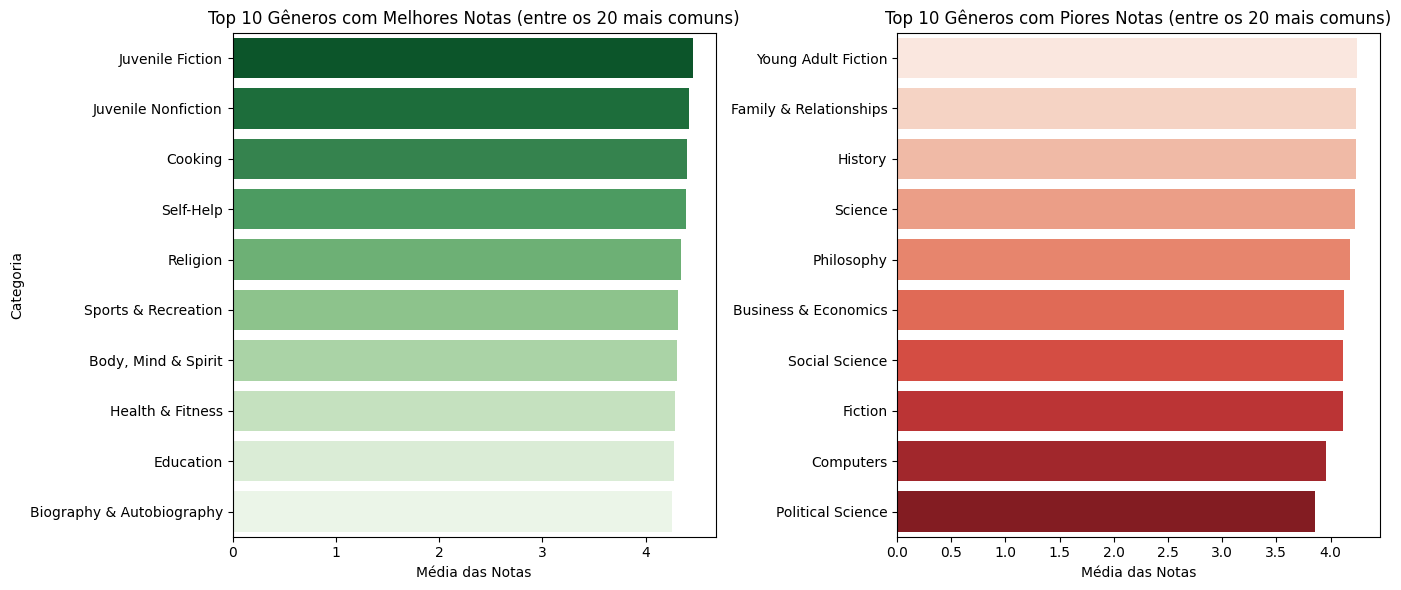

In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import ast

# 1. Cópia do DataFrame já com o merge feito
df = merged_df.copy()

# 2. Remover nulos em 'categories' e 'score'
df = df[df['categories'].notnull() & df['score'].notnull()]

# 3. Converter strings em listas reais com ast.literal_eval
def parse_categories(x):
    try:
        return ast.literal_eval(x)
    except:
        return []

df['category_list'] = df['categories'].apply(parse_categories)

# 4. Explodir a lista de categorias
df_exploded = df.explode('category_list')

# 5. Limpar espaços extras
df_exploded['category_list'] = df_exploded['category_list'].astype(str).str.strip()

# 6. Selecionar as 20 categorias mais comuns
top20_categorias = df_exploded['category_list'].value_counts().head(20).index
df_top20 = df_exploded[df_exploded['category_list'].isin(top20_categorias)]

# 7. Calcular média de score por categoria
categoria_score = (
    df_top20.groupby('category_list')['score']
    .mean()
    .sort_values(ascending=False)
)

# 8. Separar top 10 melhores e piores
top10_melhores = categoria_score.head(10)
top10_piores = categoria_score.tail(10)

# 9. Plotar gráficos
plt.figure(figsize=(14, 6))

# Gráfico: Top 10 melhores
plt.subplot(1, 2, 1)
sns.barplot(
    x=top10_melhores.values,
    y=top10_melhores.index,
    hue=top10_melhores.index,
    palette='Greens_r',
    legend=False
)
plt.title('Top 10 Gêneros com Melhores Notas (entre os 20 mais comuns)')
plt.xlabel('Média das Notas')
plt.ylabel('Categoria')

# Gráfico: Top 10 piores
plt.subplot(1, 2, 2)
sns.barplot(
    x=top10_piores.values,
    y=top10_piores.index,
    hue=top10_piores.index,
    palette='Reds',
    legend=False
)
plt.title('Top 10 Gêneros com Piores Notas (entre os 20 mais comuns)')
plt.xlabel('Média das Notas')
plt.ylabel('')

plt.tight_layout()
plt.show()




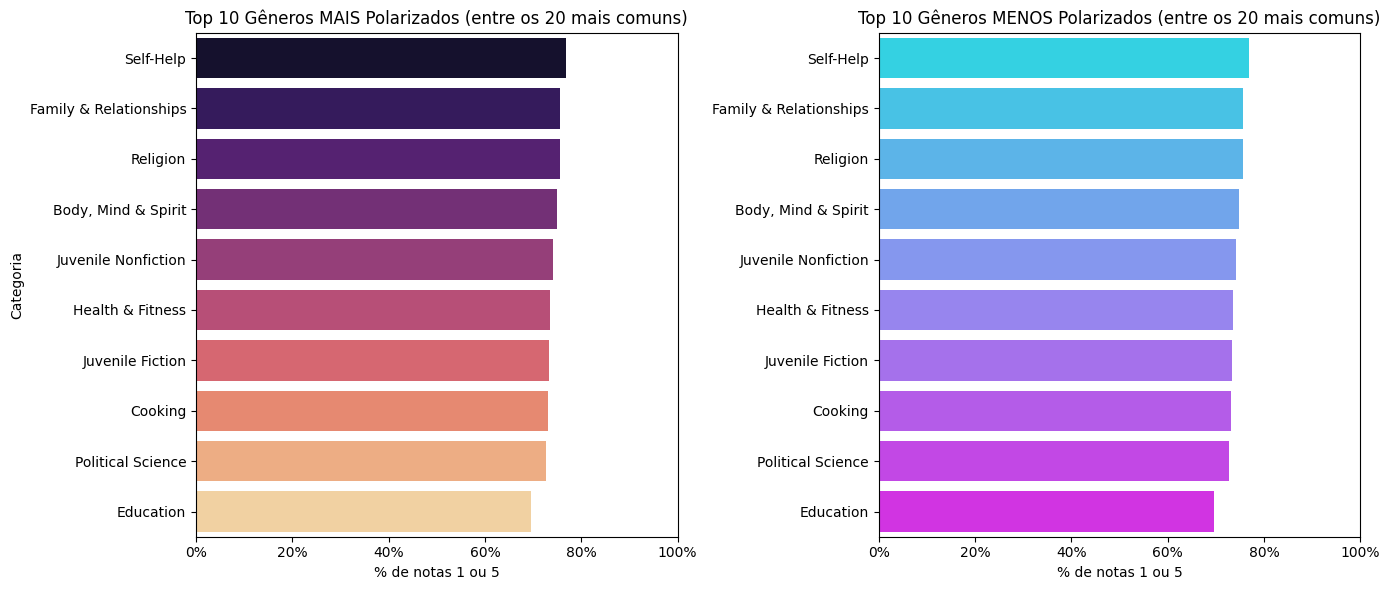

In [19]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import ast

# ---------- 1. Preparação do DataFrame ----------
df = merged_df.copy()

# Manter apenas linhas com categoria e score válidos
df = df[df['categories'].notnull() & df['score'].notnull()]

# Converter string -> lista de categorias
def parse_categories(x):
    try:
        return ast.literal_eval(x)
    except:
        return []

df['category_list'] = df['categories'].apply(parse_categories)

# Explodir categorias
df_exp = df.explode('category_list').copy()
df_exp['category_list'] = df_exp['category_list'].astype(str).str.strip()

# ---------- 2. Definir métrica de polarização ----------
# Consideraremos "extremo" se score for 1 ou 5
df_exp['extremo'] = df_exp['score'].isin([1, 5])

# Contar nº total de reviews e nº de extremos por categoria
polar_stats = (
    df_exp.groupby('category_list')
          .agg(total_reviews=('score', 'count'),
               extremos=('extremo', 'sum'))
          .reset_index()
)

# Calcular porcentagem de notas extremas
polar_stats['pct_extremos'] = polar_stats['extremos'] / polar_stats['total_reviews']

# ---------- 3. Manter apenas categorias com volume relevante ----------
# Filtrar para as 20 categorias com mais reviews
top20_cats = (
    df_exp['category_list'].value_counts()
          .head(20)
          .index
)
polar_stats_top20 = polar_stats[polar_stats['category_list'].isin(top20_cats)]

# ---------- 4. Separar top 10 mais e menos polarizadas ----------
top10_polarizadas   = polar_stats_top20.sort_values('pct_extremos', ascending=False).head(10)
top10_nao_polarizadas = polar_stats_top20.sort_values('pct_extremos', ascending=False).head(10)

# ---------- 5. Visualização ----------
plt.figure(figsize=(14, 6))

# Gráfico 1: Mais polarizadas
plt.subplot(1, 2, 1)
sns.barplot(
    x='pct_extremos', 
    y='category_list', 
    data=top10_polarizadas, 
    hue='category_list', 
    palette='magma', 
    legend=False
)
plt.xlabel('% de notas 1 ou 5')
plt.ylabel('Categoria')
plt.title('Top 10 Gêneros MAIS Polarizados (entre os 20 mais comuns)')
plt.xlim(0, 1)
plt.gca().xaxis.set_major_formatter(plt.FuncFormatter(lambda v, _ : f'{v:.0%}'))

# Gráfico 2: Menos polarizadas
plt.subplot(1, 2, 2)
sns.barplot(
    x='pct_extremos', 
    y='category_list', 
    data=top10_nao_polarizadas, 
    hue='category_list', 
    palette='cool', 
    legend=False
)
plt.xlabel('% de notas 1 ou 5')
plt.ylabel('')
plt.title('Top 10 Gêneros MENOS Polarizados (entre os 20 mais comuns)')
plt.xlim(0, 1)
plt.gca().xaxis.set_major_formatter(plt.FuncFormatter(lambda v, _ : f'{v:.0%}'))

plt.tight_layout()
plt.show()


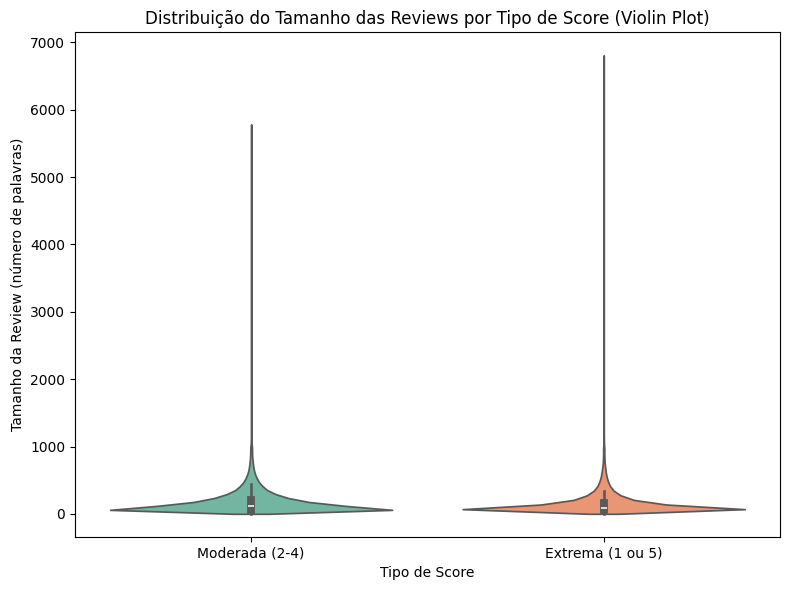

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Trabalhar sobre merged_df
df = merged_df.copy()

# 2. Remover nulos em texto e score
df = df[df['text'].notnull() & df['score'].notnull()]

# 3. Calcular tamanho da review (número de palavras ou caracteres)
df['text_length'] = df['text'].apply(lambda x: len(x.split()))  # número de palavras
# df['text_length'] = df['text'].str.len()  # alternativa: número de caracteres

# 4. Criar coluna de tipo de score: extrema ou moderada
df['tipo_score'] = df['score'].apply(lambda x: 'Extrema (1 ou 5)' if x in [1, 5] else 'Moderada (2-4)')

# 5. Violin plot (sem FutureWarning)
plt.figure(figsize=(8, 6))
sns.violinplot(
    x='tipo_score',
    y='text_length',
    hue='tipo_score',
    data=df,
    palette='Set2',
    cut=0,
    legend=False
)
plt.title('Distribuição do Tamanho das Reviews por Tipo de Score (Violin Plot)')
plt.xlabel('Tipo de Score')
plt.ylabel('Tamanho da Review (número de palavras)')
plt.tight_layout()
plt.show()


In [21]:
resumo = df.groupby('tipo_score')['text_length'].agg(['mean', 'median', 'std', 'count'])
print(resumo)


                        mean  median         std    count
tipo_score                                               
Extrema (1 ou 5)  133.056589    85.0  157.112847  2009023
Moderada (2-4)    165.015529   111.0  172.834477   990969


In [26]:

# Correlação de Pearson (linear)
cor_pearson = df['text_length'].corr(df['score'], method='pearson')

# Correlação de Spearman (rankeada)
cor_spearman = df['text_length'].corr(df['score'], method='spearman')

# Correlação de Kendall (rankeada e robusta)
cor_kendall = df['text_length'].corr(df['score'], method='kendall')

print(f"Pearson: {cor_pearson:.4f}")
print(f"Spearman: {cor_spearman:.4f}")
print(f"Kendall : {cor_kendall:.4f}")


Pearson: -0.0477
Spearman: -0.1075
Kendall : -0.0819


In [ ]:
merged_df.to_parquet('data/merged_df.parquet', index=False)
